In [92]:
from os import path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

DATA_FOLDER = "../data/original/"

In [93]:
vistas_df = train = pd.read_csv(path.join(DATA_FOLDER, "vistas.csv"))
contactos_df = train = pd.read_csv(path.join(DATA_FOLDER, "contactos.csv"))
avisos_df = train = pd.read_csv(path.join(DATA_FOLDER, "avisos.csv"))
amenities_df = train = pd.read_csv(path.join(DATA_FOLDER, "amenities.csv"))
avisos_and_amenities_df = pd.merge(avisos_df , amenities_df)

In [94]:
vistas_df.head()

,idusuario,idaviso,fecha
0,106137,161479,2014-05-29 14:29:42.572
1,106137,161479,2014-05-29 14:55:26.856
2,106137,161479,2014-05-29 14:55:27.565
3,45846,161479,2014-05-06 20:00:16.651
4,28014,161479,2014-05-31 11:01:24.690


In [95]:
contactos_df.head()

,idusuario,idaviso,fecha
0,3646,223982,2014-05-04 09:10:07
1,3646,191962,2014-05-09 10:31:53
2,3646,143212,2014-05-09 10:44:08
3,3646,119947,2014-05-16 10:24:22
4,3646,83736,2014-05-16 15:30:19


In [96]:
avisos_df.head()

,idciudad,idcategoriatipodepropiedad,idtipodepropiedad,idtipodeoperacion,zonacoins,superficie,garages,banos,habitaciones,idaviso
0,0,1,2,1,54161.7,34.4,1,2,2,556135
1,1,1,1003,1,42876.0,394.6,0,0,0,816656
2,1,2,1005,2,476.0,52.8,0,2,0,94326
3,1,1,1,1,177161.7,52.8,2,3,4,787720
4,1,1,2,1,61447.4,44.2,2,2,2,400921


In [97]:
amenities_df.head()

,parrilla,pileta,camara_seguridad,salon_de_fiestas,expensas,medio_bano,idaviso
0,0,0,0,0,NaN,1,184889
1,1,0,1,1,NaN,3,680661
2,0,0,0,0,NaN,6,104964
3,0,0,0,0,23.3,0,220115
4,0,0,0,0,NaN,1,113140


In [98]:
avisos_and_amenities_df.head()

,idciudad,idcategoriatipodepropiedad,idtipodepropiedad,idtipodeoperacion,zonacoins,superficie,garages,banos,habitaciones,idaviso,parrilla,pileta,camara_seguridad,salon_de_fiestas,expensas,medio_bano
0,0,1,2,1,54161.7,34.4,1,2,2,556135,0,0,0,0,NaN,1
1,1,1,1003,1,42876.0,394.6,0,0,0,816656,0,0,0,0,NaN,0
2,1,2,1005,2,476.0,52.8,0,2,0,94326,0,0,0,0,12.3,0
3,1,1,1,1,177161.7,52.8,2,3,4,787720,0,0,0,0,NaN,1
4,1,1,2,1,61447.4,44.2,2,2,2,400921,0,0,0,0,15.5,0


### Average of times a user visits a link before contacting
Intento de conseguir algo coherente

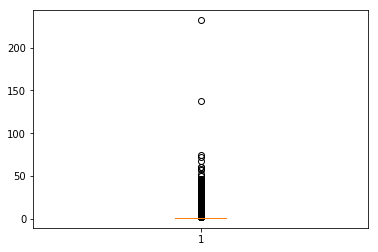

In [103]:
visited_and_contacted = pd.merge(vistas_df[['idusuario', 'idaviso']], contactos_df[['idusuario', 'idaviso']], how='right')
data_to_plot = [visited_and_contacted.groupby(['idusuario', 'idaviso']).size().as_matrix()]

plt.figure()
plt.boxplot(data_to_plot)

plt.show()